In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import math

import summarize


In [42]:
#read relationships csv into a dataframe, manually added column names
df = pd.read_csv('50k-posts-from-relationship-advice.csv', names = ['age_f', 'age_m', 'id', 'post'])
df.head(20)

,age_f,age_m,id,post
0,24,25,3iwivb,I'm [25/M] having issues with my GF [24/F] Fac...
1,18,20,3iwrcd,I [20M] asked a friend [18F] to the movies. Di...
2,17,16,3iwucq,Me (16/M) not sure if co-worker (17/F) is bein...
3,17,16,3iwx0l,Me [16/M] Not sure if my co-worker [17/F] is b...
4,26,22,3iwx5t,Me [22/M] and my GF [26/F] having been seeing ...
5,35,42,3iwxnf,Is my wife [35/F] controlling or is it me [42/M]?
6,24,26,3ix465,"Me [24f] with my GF [26m] of 2 years, how can ..."
7,26,25,3ix4op,Am I (26/f)overreacting over his actions (25/m...
8,22,38,3ix5vg,She [22/f] didn't tell me she was in a long-di...
9,30,30,3ixdul,[30/m] Girlfriend [30/f] Went to Concert Witho...


In [9]:
summarize.df_summary(df)

--- Shape: (47540, 4)
--- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47540 entries, 0 to 47539
Data columns (total 4 columns):
age_f    47540 non-null int64
age_m    47540 non-null int64
id       47540 non-null object
post     47540 non-null object
dtypes: int64(2), object(2)
memory usage: 1.5+ MB
--- Descriptions
               age_f         age_m      id  \
count   47540.000000  47540.000000   47540   
unique           NaN           NaN   47540   
top              NaN           NaN  5ie9xe   
freq             NaN           NaN       1   
mean       23.050715     24.269605     NaN   
std        23.436143      6.315841     NaN   
min         0.000000      5.000000     NaN   
25%        19.000000     20.000000     NaN   
50%        22.000000     23.000000     NaN   
75%        25.000000     27.000000     NaN   
max      5000.000000    420.000000     NaN   

                                                     post  
count                                               47540  

Text(0, 0.5, 'Male Age')

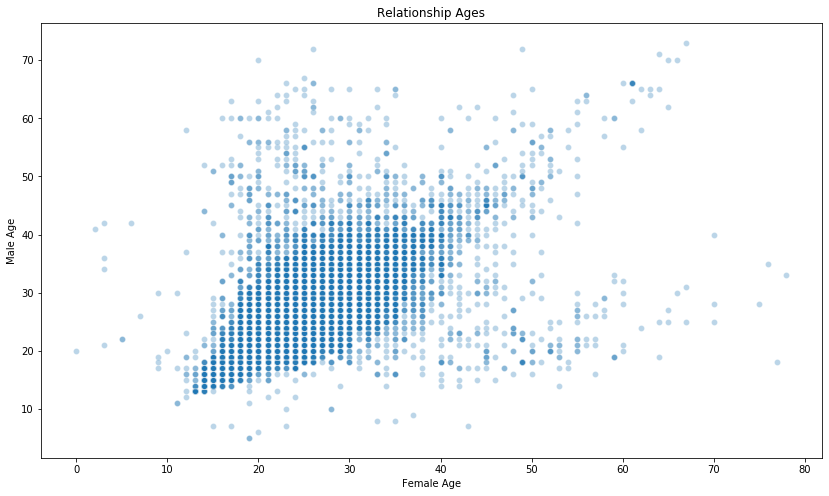

In [59]:
plt.figure(figsize=  (14,8))
df = df[(df.age_f < 80) & (df.age_m < 80)]
sns.scatterplot(df.age_f, df.age_m, alpha = .3)
plt.title('Relationship Ages')
plt.xlabel('Female Age')
plt.ylabel('Male Age')

Text(0, 0.5, 'Amount (log scale)')

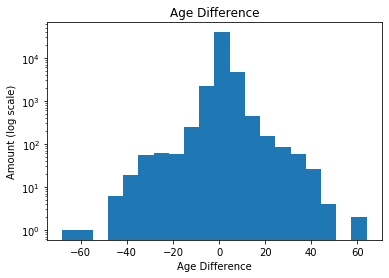

In [49]:
age_diff = df.age_m - df.age_f
plt.hist(age_diff, log = True, bins = 20)
plt.title('Age Difference')
plt.xlabel('Age Difference')
plt.ylabel('Amount (log scale)')

Text(0, 0.5, 'Number of Clusters')

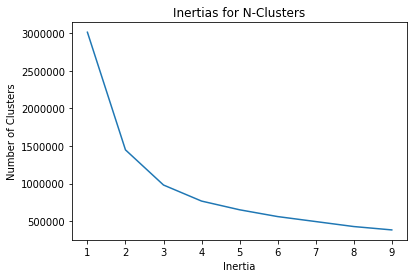

In [53]:
inertia = []

for i in range(1,10):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df[['age_f', 'age_m']])
    inertia.append(kmeans.inertia_)
sns.lineplot( range(1,10), inertia )
plt.title('Inertias for N-Clusters')
plt.xlabel('Inertia')
plt.ylabel('Number of Clusters')

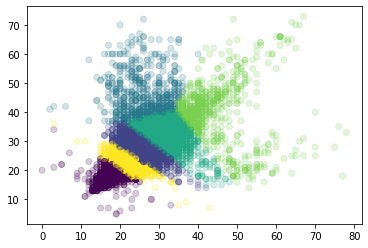

In [68]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df[['age_f', 'age_m']])
df['cluster'] = kmeans.predict(df[['age_f', 'age_m']])
plt.scatter(x = df.age_f, y = df.age_m, c = df.cluster, alpha = .2)

# Viz Warmup 11/8

In [11]:
mpg = data('mpg')

In [95]:
mpg.head()
mpg['cyl'] = mpg.cyl.astype(str)

In [96]:
plt.rc('figure', figsize = (12,9))
plt.rc('axes', grid = True)


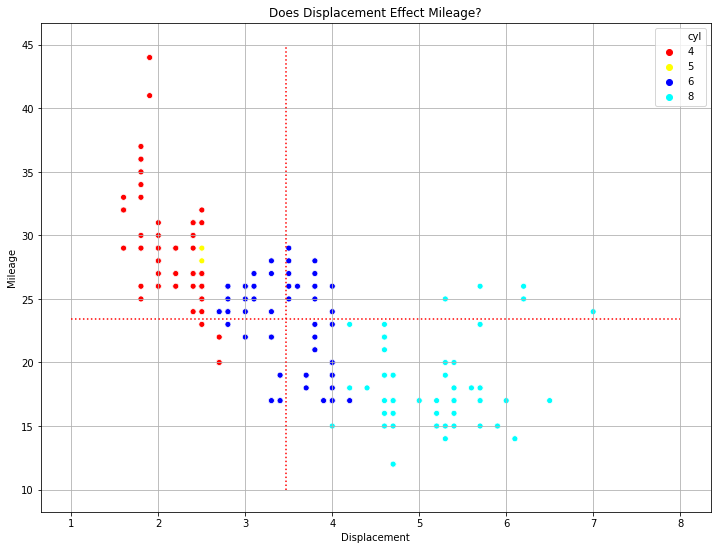

In [107]:
y = mpg.hwy
x = mpg.displ
sns.scatterplot(x = 'displ', y = 'hwy', data = mpg, hue = 'cyl', palette = ['red','yellow','blue','cyan'])
plt.xlabel('Displacement')
plt.ylabel('Mileage')
plt.title('Does Displacement Effect Mileage?')
plt.vlines(mpg.displ.mean(),10,45, linestyle = ':', color = 'red')
plt.hlines(mpg.hwy.mean(),1,8,  linestyle = ':', color = 'red')
plt.legend()

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

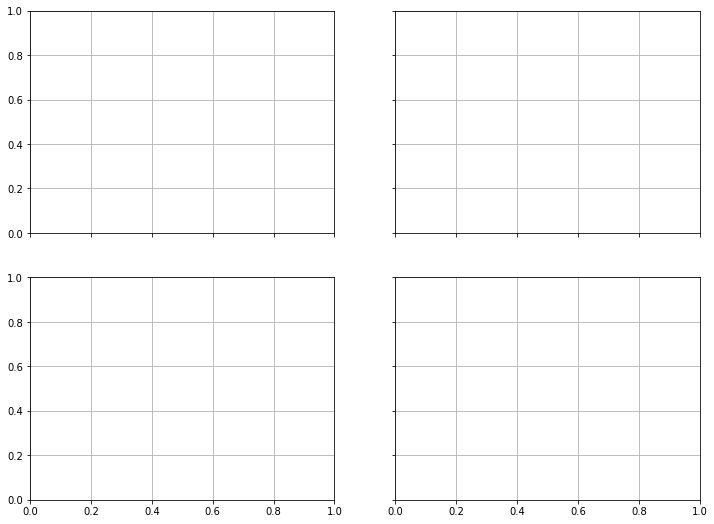

In [115]:
fig, axs = plt.subplots(2,2, sharex= True, sharey=  True)

for i,j in enumerate(mpg.cyl.unique()):
    axs[i].scatter(mpg[mpg.cyl == j].displ, mpg[mpg.cyl == j].hwy)
    

In [109]:
for i,j in enumerate(mpg.cyl.unique()):
    print(i,j)

0 4
1 6
2 8
3 5
